In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("MY2022 Fuel Consumption Ratings.csv")

In [3]:
# 'Vehicle Class'
# 'Engine Size(L)'
# 'Fuel Type'
# 'CO2 Emissions(g/km)'
# 'CO2 Rating'
# 'Smog Rating'

In [4]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,NaN,7.0,8.6,33.0,200.0,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         945 non-null    int64  
 1   Make                               945 non-null    object 
 2   Model                              945 non-null    object 
 3   Vehicle Class                      945 non-null    object 
 4   Engine Size(L)                     945 non-null    float64
 5   Cylinders                          945 non-null    int64  
 6   Transmission                       945 non-null    object 
 7   Fuel Type                          944 non-null    object 
 8   Fuel Consumption (City (L/100 km)  931 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   930 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  945 non-null    float64
 11  Fuel Consumption(Comb (mpg))       931 non-null    float64

In [6]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,945.0,945.000000,945.000000,931.000000,930.000000,945.000000,931.000000,934.000000,932.000000,927.000000
mean,2022.0,3.199683,5.669841,12.506337,9.358602,11.093439,27.259936,259.131692,4.550429,4.952535
std,0.0,1.375231,1.932930,3.439307,2.292177,2.877491,7.724079,64.333743,1.469573,1.682046
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.500000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.000000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [7]:
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

# Data cleaning and transformation

In [8]:
df.isnull().sum()

Model Year                            0
Make                                  0
Model                                 0
Vehicle Class                         0
Engine Size(L)                        0
Cylinders                             0
Transmission                          0
Fuel Type                             1
Fuel Consumption (City (L/100 km)    14
Fuel Consumption(Hwy (L/100 km))     15
Fuel Consumption(Comb (L/100 km))     0
Fuel Consumption(Comb (mpg))         14
CO2 Emissions(g/km)                  11
CO2 Rating                           13
Smog Rating                          18
dtype: int64

### Handling Null Values

In [9]:
df.fillna(df.mean(numeric_only=True).round(1),inplace=True)

#### Fuel Type

In [10]:
df['Fuel Type'].value_counts()

Fuel Type
Z    458
X    444
D     28
E     14
Name: count, dtype: int64

In [11]:
df['Fuel Type'].fillna((df['Fuel Type'].mode()[0]), inplace=True)

In [12]:
df['Fuel Type'].value_counts()

Fuel Type
Z    459
X    444
D     28
E     14
Name: count, dtype: int64

In [13]:
df.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [14]:
df['Fuel Type'].sort_values().unique()

array(['D', 'E', 'X', 'Z'], dtype=object)

### Checking for noise and unique value

In [15]:
for i in df.columns:
    print(i+":")
    print(df[i].sort_values().unique())

Model Year:
[2022]
Make:
['Acura' 'Alfa Romeo' 'Aston Martin' 'Audi' 'BMW' 'Bentley' 'Bugatti'
 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ford' 'GMC'
 'Genesis' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia'
 'Lamborghini' 'Land Rover' 'Lexus' 'Lincoln' 'MINI' 'Maserati' 'Mazda'
 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce'
 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']
Model:
['1500' '1500 4X4' '1500 4X4 EcoDiesel' '1500 4X4 TRX' '1500 4X4 eTorque'
 '1500 Classic' '1500 Classic 4X4' '1500 EcoDiesel' '1500 HFE EcoDiesel'
 '1500 HFE eTorque' '1500 eTorque' '300' '300 AWD' '330i xDrive Sedan'
 '430i xDrive Cabriolet' '430i xDrive Coupe' '4Runner 4WD'
 '4Runner 4WD (Part-Time 4WD) ' '500X AWD' '530i xDrive Sedan'
 '540i xDrive Sedan' '718 Boxster' '718 Boxster GTS 4.0' '718 Boxster S'
 '718 Boxster T' '718 Cayman' '718 Cayman GT4' '718 Cayman GTS 4.0'
 '718 Cayman S' '718 Cayman T' '718 Spyder' '750Li xDrive Sedan'
 '750i xDrive Sedan' '911 Carrera' '9

In [16]:
df.replace({'Transmission' : {'AM8':'AM', 'AS10': 'AS', 'A8':'A', 'A9':'A', 'AM7':'AM', 'AS8':'AS', 'M6':'M', 'AS6':'AS', 'AS9':'AS', 'A10':'A', 'A6':'A', 'M5':'M', 'M7':'M', 'AV7':'AV', 'AV1':'AV', 'AM6':'AM', 'AS7':'AS', 'AV8':'AV', 'AV6':'AV', 'AV10':'AV', 'AS5':'AS', 'A7':'A'}},inplace=True)

In [17]:
df['Transmission'].unique()

array(['AM', 'AS', 'A', 'M', 'AV'], dtype=object)

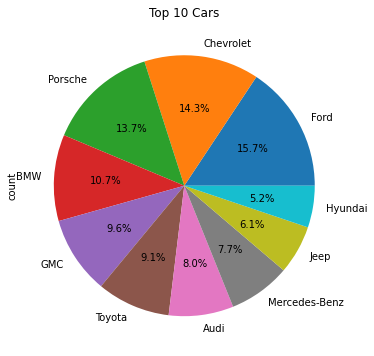

In [18]:
plt.figure(figsize=(6,6))
df['Make'].value_counts().head(10).plot(kind="pie",autopct="%0.1f%%").set_title("Top 10 Cars")
plt.show()

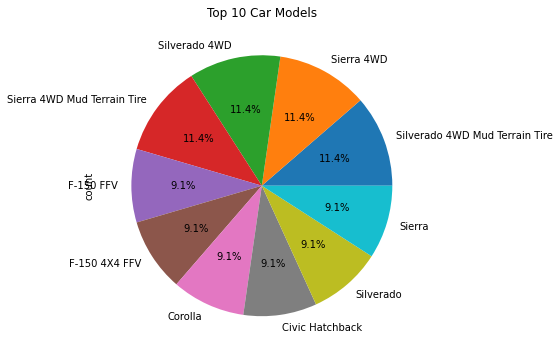

In [19]:
plt.figure(figsize=(12,6))
df['Model'].value_counts().head(10).plot(kind="pie",autopct="%0.1f%%").set_title("Top 10 Car Models")
plt.show()

## Outliers Analysis

In [20]:
outlier_columns=[]
for i in df.columns:
    if df[i].dtypes!='object' and i!='Model Year':
        outlier_columns.append(i)

In [21]:
outlier_columns

['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption (City (L/100 km)',
 'Fuel Consumption(Hwy (L/100 km))',
 'Fuel Consumption(Comb (L/100 km))',
 'Fuel Consumption(Comb (mpg))',
 'CO2 Emissions(g/km)',
 'CO2 Rating',
 'Smog Rating']

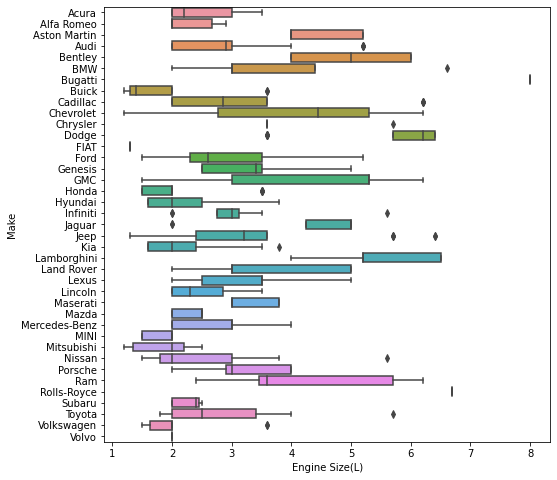

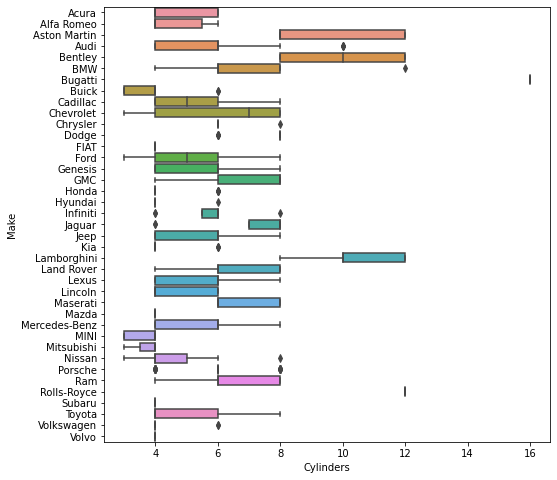

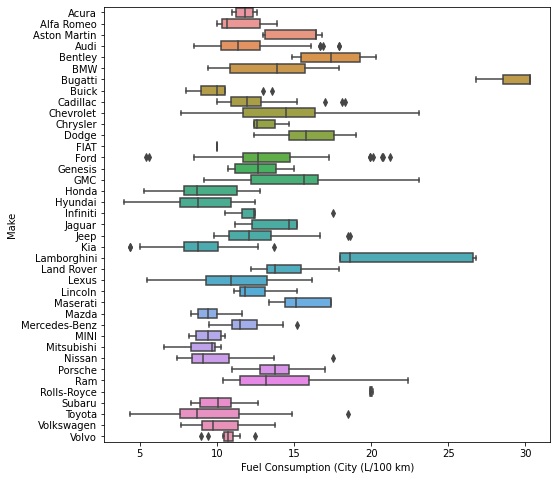

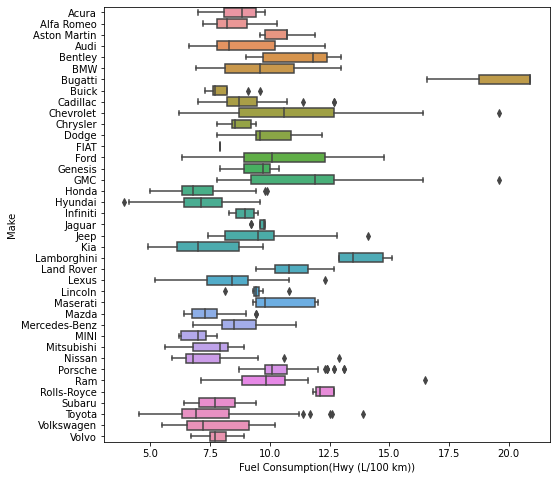

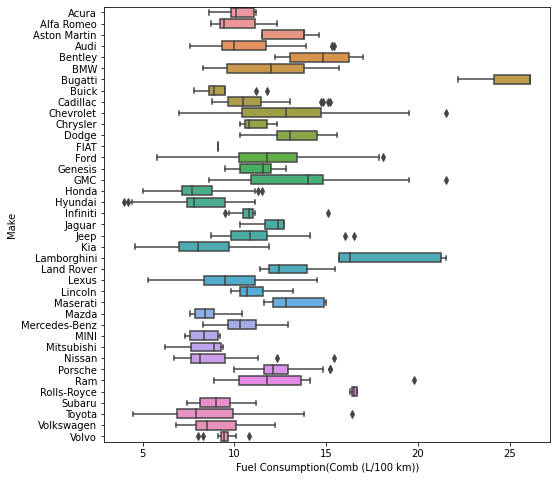

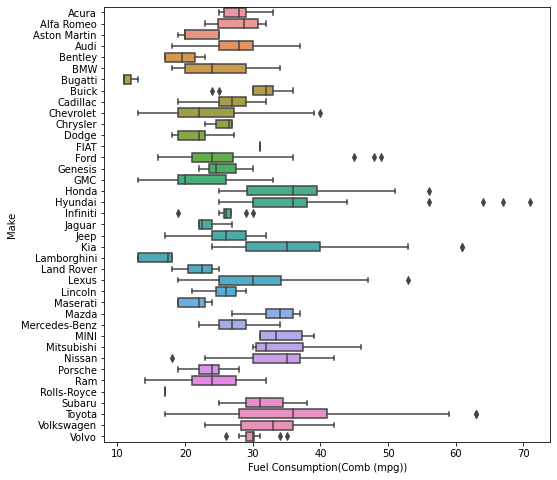

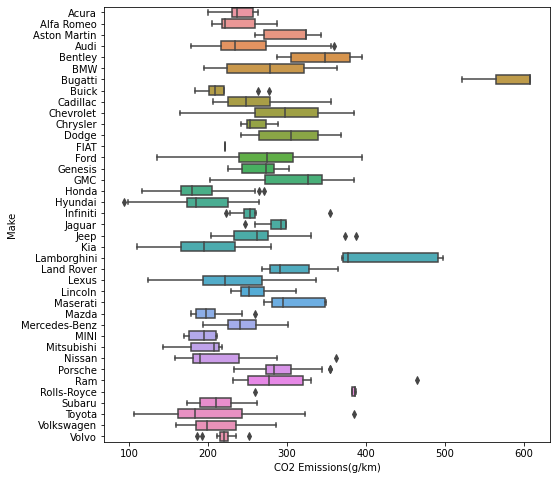

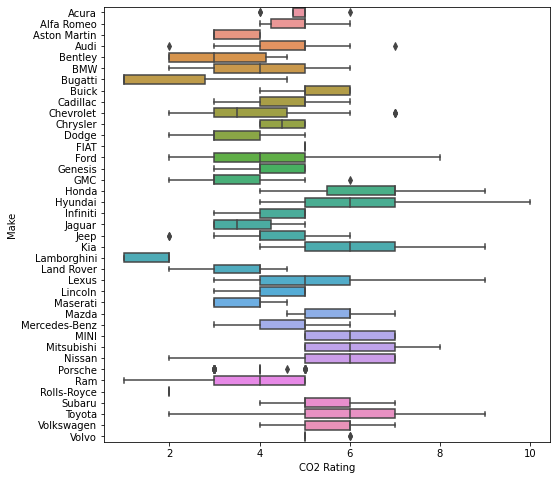

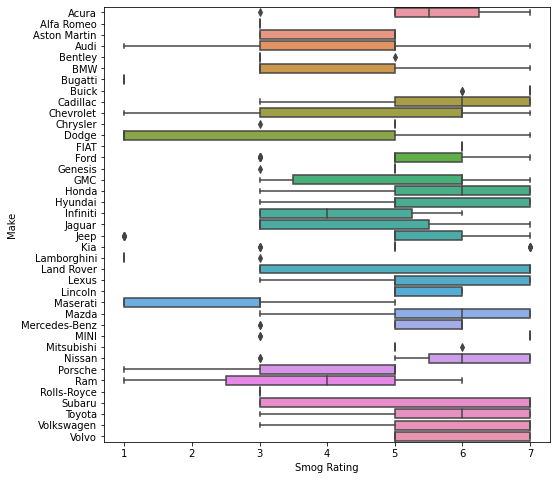

In [22]:
for col in outlier_columns:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=col,y=df['Make'],data=df)
    plt.show()

## Feature Scaling

In [23]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM,Z,12.5,7.0,8.6,33.0,200.0,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


### Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
df.select_dtypes(include='object').columns

Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')

In [26]:
object_columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [27]:
for i in object_columns:
    df[i]=le.fit_transform(df[i])

In [28]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,0,349,0,2.4,4,1,3,12.5,7.0,8.6,33.0,200.0,6.0,3.0
1,2022,0,410,7,3.5,6,2,3,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,2022,0,513,7,2.0,4,2,3,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2022,0,514,7,2.0,4,2,3,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2022,0,615,0,2.0,4,2,3,11.2,8.0,9.8,29.0,230.0,5.0,7.0


### Train Test Split

In [29]:
X=df.drop(columns='Fuel Consumption(Comb (L/100 km))')
y=df['Fuel Consumption(Comb (L/100 km))']

In [30]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25,random_state=0)

X_train.shape, X_test.shape

((708, 14), (237, 14))

### Feature Selection **--Dropping Constant Feature--**

In [31]:
from sklearn.feature_selection import VarianceThreshold

In [32]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [33]:
var_thres.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [34]:
# Lets Find non-constant features 
len(X_train.columns[var_thres.get_support()])

13

In [35]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [36]:
for column in constant_columns:
    print(column)

Model Year


##### As Model Year Column is the only constant column, lets drop it from train and test dataset

In [37]:
X_train.drop(constant_columns,axis=1,inplace=True)

In [38]:
X_test.drop(constant_columns,axis=1,inplace=True)

## Feature Selection- With Correlation

In [39]:
numerical_columns=outlier_columns
numerical_columns

['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption (City (L/100 km)',
 'Fuel Consumption(Hwy (L/100 km))',
 'Fuel Consumption(Comb (L/100 km))',
 'Fuel Consumption(Comb (mpg))',
 'CO2 Emissions(g/km)',
 'CO2 Rating',
 'Smog Rating']

In [40]:
cor=X_train[['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption (City (L/100 km)',
 'Fuel Consumption(Hwy (L/100 km))',
 'Fuel Consumption(Comb (mpg))',
 'CO2 Emissions(g/km)',
 'CO2 Rating',
 'Smog Rating']].corr()

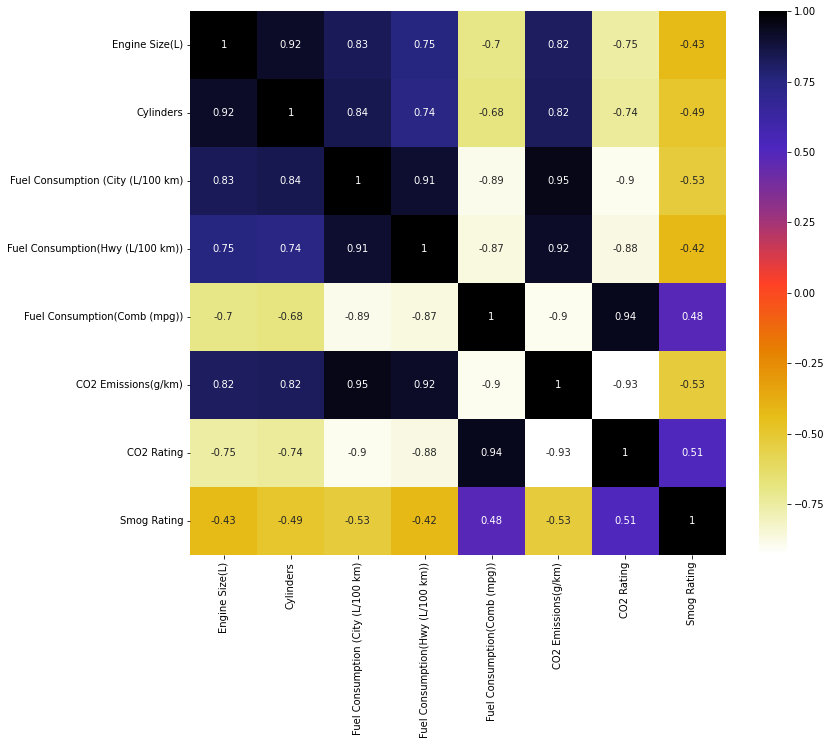

In [41]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [42]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

4

In [44]:
corr_features

{'CO2 Emissions(g/km)',
 'CO2 Rating',
 'Cylinders',
 'Fuel Consumption(Hwy (L/100 km))'}

As all Fuel Consumption Columns are similar to each other,let's drop all of it from train and test dataset

In [45]:
X_train.drop(['Fuel Consumption(Comb (mpg))','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))'],axis=1,inplace=True)

In [46]:
X_test.drop(['Fuel Consumption(Comb (mpg))','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))'],axis=1,inplace=True)

In [47]:
X_train.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),CO2 Rating,Smog Rating
636,28,138,7,2.5,4,2,2,209.0,5.0,6.0
54,3,557,2,2.9,6,2,3,254.0,5.0,5.0
45,3,517,10,4.0,8,2,3,319.0,3.0,3.0
366,15,302,0,3.3,6,2,3,273.0,4.0,3.0
172,9,109,7,2.0,4,0,2,232.0,5.0,7.0


In [48]:
# Lets check again for correlation

In [49]:
cor=X_train[['Engine Size(L)',
 'Cylinders',
 'CO2 Emissions(g/km)',
 'CO2 Rating',
 'Smog Rating']].corr()

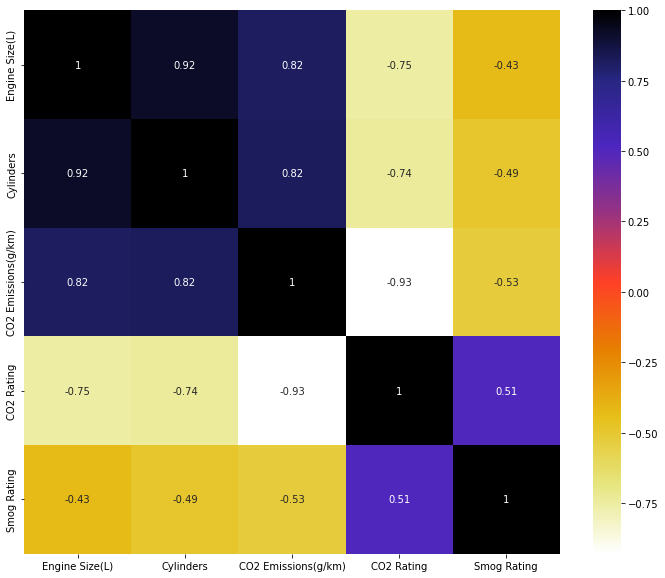

In [50]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [51]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [52]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

2

In [53]:
corr_features

{'CO2 Rating', 'Cylinders'}

As from the observation we can clearly see that 'CO2 Rating' and 'CO2 Emissions(g/km)' are inversely correleted but 'Cylinders' and 'Engine Size(L)' are highly correleted to each other.

## Fisher Score- Chisquare Test For Feature Selection

In [54]:
object_columns

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [55]:
y_train=y_train.round(0).astype(int)

In [56]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train[['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']],y_train)

In [57]:
f_p_values

(array([ 564.87762162, 5218.26100678,  143.71306249,  117.2814751 ,
          15.22898987]),
 array([1.28188526e-107, 0.00000000e+000, 3.55011464e-021, 3.56730101e-016,
        7.07936389e-001]))

In [58]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train[['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']].columns
p_values

Make             1.281885e-107
Model             0.000000e+00
Vehicle Class     3.550115e-21
Transmission      3.567301e-16
Fuel Type         7.079364e-01
dtype: float64

In [59]:
p_values.sort_index(ascending=False)

Vehicle Class     3.550115e-21
Transmission      3.567301e-16
Model             0.000000e+00
Make             1.281885e-107
Fuel Type         7.079364e-01
dtype: float64

### Observation

Vehicle Class Column is the most important column when compared to the output feature Fuel Consumption(Comb (L/100 km))

## Feature Selection-Information gain - mutual information In Regression Problem Statements

In [60]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.33563229, 0.43773144, 0.27042576, 0.75130124, 0.62914299,
       0.23293023, 0.1540607 , 2.08291228, 1.3750722 , 0.3172836 ])

In [61]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

CO2 Emissions(g/km)    2.082912
CO2 Rating             1.375072
Engine Size(L)         0.751301
Cylinders              0.629143
Model                  0.437731
Make                   0.335632
Smog Rating            0.317284
Vehicle Class          0.270426
Transmission           0.232930
Fuel Type              0.154061
dtype: float64

<Axes: >

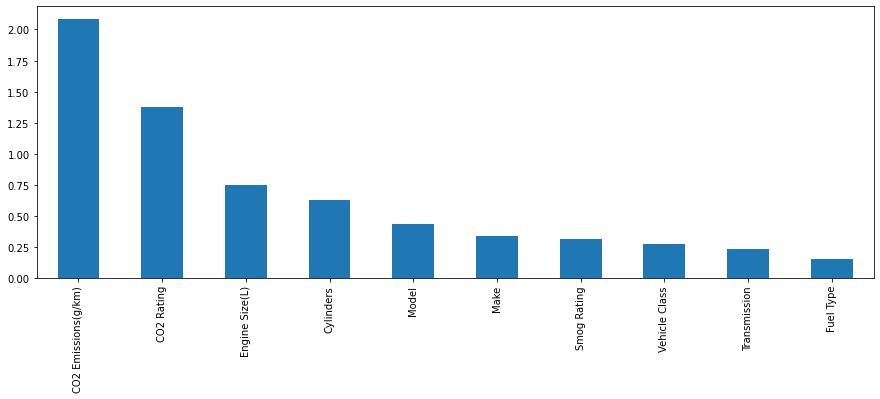

In [62]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

Text(0.5, 1.0, 'Mututal Information Gain')

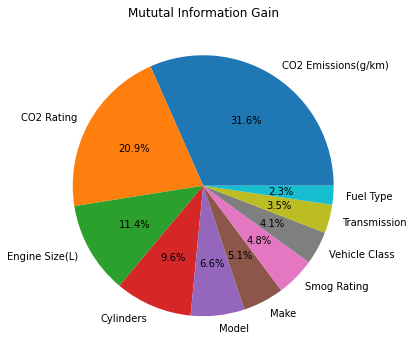

In [63]:
mutual_info.sort_values(ascending=False).plot(kind="pie",autopct="%0.1f%%",figsize=(15,6)).set_title("Mututal Information Gain")

## ExtraTreesRegressor

This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [64]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X_train.fillna(0), y_train)

ExtraTreesRegressor()

In [65]:
print(model.feature_importances_)

[0.00193517 0.0020186  0.00198197 0.16159753 0.12900803 0.00391516
 0.04531896 0.31472819 0.32697998 0.01251641]


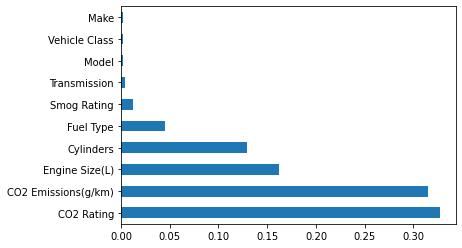

In [66]:
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [67]:
X_train.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'CO2 Emissions(g/km)', 'CO2 Rating',
       'Smog Rating'],
      dtype='object')

In [68]:
object_columns

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [69]:
numerical_columns

['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption (City (L/100 km)',
 'Fuel Consumption(Hwy (L/100 km))',
 'Fuel Consumption(Comb (L/100 km))',
 'Fuel Consumption(Comb (mpg))',
 'CO2 Emissions(g/km)',
 'CO2 Rating',
 'Smog Rating']

### Observation

Considering all the observation of Feature selection techniques, 'Make', 'Model', 'Vehicle Class', 'Transmission' are common which are less important to feature selection but Chi Square Analysis shows that Vehicle Class is the most important among all the Categorical Columns, as a result we can drop 'Make', 'Model' and 'Transmission'.

Also pearson correlation shows that 'Cylinders' having less coefficient weightage and 'Engine Size(L)' are highly correleted to each other. And 'Cylinders' having less coefficient weightage, we can drop 'Cylinders' feature from our dataset.

In [70]:
X_train=X_train.drop(['Make', 'Model', 'Transmission','Cylinders'],axis=1)

In [71]:
X_test=X_test.drop(['Make', 'Model', 'Transmission','Cylinders'],axis=1)

## Let's rename all the columns properly

In [72]:
X_train.columns

Index(['Vehicle Class', 'Engine Size(L)', 'Fuel Type', 'CO2 Emissions(g/km)',
       'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [73]:
X_train=X_train.rename(columns = {'Vehicle Class':'Vehicle Class', 'Engine Size(L)':'Engine Size', 'Fuel Type':'Fuel Type', 'CO2 Emissions(g/km)':'CO2 Emissions', 'CO2 Rating':'CO2 Rating', 'Smog Rating':'Smog Rating'})

In [74]:
X_test=X_test.rename(columns = {'Vehicle Class':'Vehicle Class', 'Engine Size(L)':'Engine Size', 'Fuel Type':'Fuel Type', 'CO2 Emissions(g/km)':'CO2 Emissions', 'CO2 Rating':'CO2 Rating', 'Smog Rating':'Smog Rating'})

In [75]:
y_train=y_train.rename('Fuel Consumption')

In [76]:
y_test=y_test.rename('Fuel Consumption')

## Outliers

In [77]:
X_train['Fuel Consumption']=y_train

In [78]:
X_train.head()

,Vehicle Class,Engine Size,Fuel Type,CO2 Emissions,CO2 Rating,Smog Rating,Fuel Consumption
636,7,2.5,2,209.0,5.0,6.0,9
54,2,2.9,3,254.0,5.0,5.0,11
45,10,4.0,3,319.0,3.0,3.0,14
366,0,3.3,3,273.0,4.0,3.0,12
172,7,2.0,2,232.0,5.0,7.0,10


In [79]:
X_train.columns

Index(['Vehicle Class', 'Engine Size', 'Fuel Type', 'CO2 Emissions',
       'CO2 Rating', 'Smog Rating', 'Fuel Consumption'],
      dtype='object')

In [80]:
object_columns

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [81]:
o_columns=['Engine Size','CO2 Emissions', 'CO2 Rating', 'Smog Rating']

In [82]:
o_columns

['Engine Size', 'CO2 Emissions', 'CO2 Rating', 'Smog Rating']

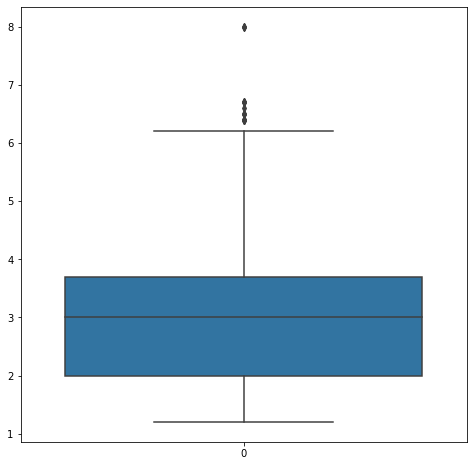

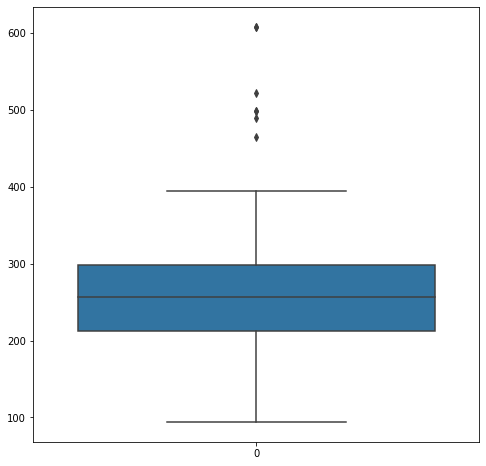

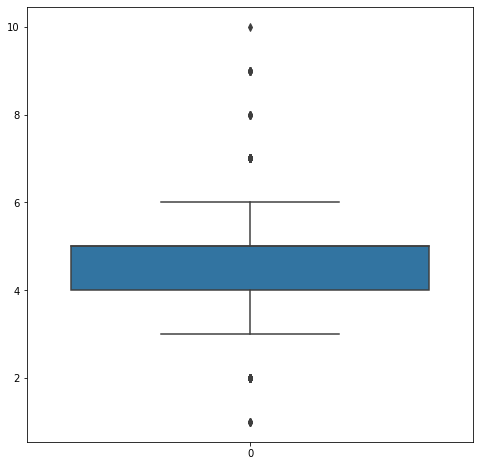

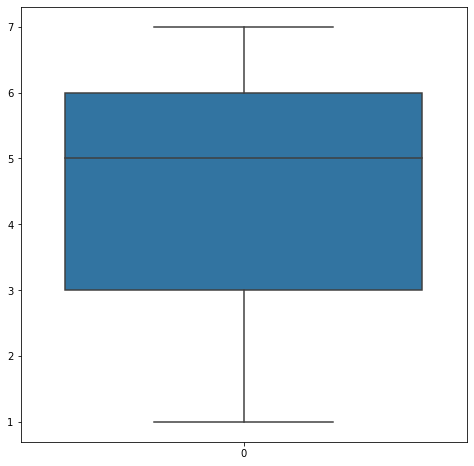

In [83]:
for col in o_columns:
    plt.figure(figsize=(8,8))
    sns.boxplot(X_train[col])
    plt.show()

In [84]:
X_train.shape

(708, 7)

In [85]:
for i in o_columns:
    q25=X_train[i].quantile(0.25)
    q75=X_train[i].quantile(0.75)
    iqr=q75-q25
    print(f"{i} IQR:{iqr}")
    upper_limit=q75+(1.5*iqr)
    print(f"{i} upper_limit:{upper_limit}")
    lower_limit=q25-(1.5*iqr)
    print(f"{i} lower_limit:{lower_limit}")
    X_train=X_train[(X_train[i]>=lower_limit) & (X_train[i]<=upper_limit)]

Engine Size IQR:1.7000000000000002
Engine Size upper_limit:6.25
Engine Size lower_limit:-0.5500000000000003
CO2 Emissions IQR:83.0
CO2 Emissions upper_limit:419.5
CO2 Emissions lower_limit:87.5
CO2 Rating IQR:1.0
CO2 Rating upper_limit:6.5
CO2 Rating lower_limit:2.5
Smog Rating IQR:3.0
Smog Rating upper_limit:10.5
Smog Rating lower_limit:-1.5


In [86]:
X_train.shape

(585, 7)

In [87]:
y_train=X_train['Fuel Consumption']

In [88]:
X_train.drop('Fuel Consumption',axis=1,inplace=True)

### Feature Scalling

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
sc = StandardScaler()

In [91]:
X_train = sc.fit_transform(X_train)

In [92]:
X_train

array([[ 0.1972876 , -0.54064002, -0.6349674 , -1.13437114,  0.60312847,
         0.71739471],
       [-1.21019103, -0.20274001,  0.80478427, -0.15912848,  0.60312847,
         0.07074463],
       [ 1.04177478,  0.72648502,  0.80478427,  1.24955536, -1.43871269,
        -1.22255555],
       ...,
       [ 0.1972876 , -1.38539004, -0.6349674 , -1.1560432 ,  1.62404905,
         0.07074463],
       [-1.77318248, -0.96301503, -0.6349674 , -1.78453291,  0.19476023,
        -1.22255555],
       [ 0.1972876 , -0.96301503,  0.80478427, -0.52755349,  0.60312847,
         0.71739471]])

In [93]:
X_test = sc.transform(X_test)

In [94]:
X_test

array([[-0.08420812,  2.58493508,  0.80478427,  1.46627595, -1.43871269,
         0.71739471],
       [ 0.1972876 , -0.54064002, -0.6349674 , -0.59256966,  0.60312847,
         0.07074463],
       [-1.49168675,  0.72648502,  0.80478427,  0.85945829, -1.43871269,
         0.07074463],
       ...,
       [ 0.1972876 ,  0.38858501, -0.6349674 ,  0.2743127 , -0.41779211,
         1.3640448 ],
       [-0.08420812,  1.57123505, -0.6349674 ,  0.92447447, -1.43871269,
         0.07074463],
       [-1.49168675,  3.00731009,  0.80478427,  2.72325538, -2.45963328,
        -1.22255555]])

In [151]:
import pickle
pickle.dump(sc,open('scaling.pkl','wb'))

# Training Models

## Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [96]:
lr.fit(X_train,y_train)

LinearRegression()

In [97]:
lr.intercept_

11.174358974358974

Checking if model is overfitted or underfitted

In [98]:
print("training score = ",lr.score(X_train,y_train))
print("testing score = ",lr.score(X_test,y_test))

training score =  0.881067409298277
testing score =  0.9318109118701334


In [99]:
ypred = lr.predict(X_test)

In [100]:
from sklearn.metrics import r2_score

In [101]:
r2_score(y_test, ypred)

0.9318109118701334

## Decision Tree Regressor

In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [103]:
dr=DecisionTreeRegressor(max_depth=4)

In [104]:
dr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [105]:
ypred=dr.predict(X_test)

Checking if model is overfitted or underfitted

In [106]:
print("training score = ",dr.score(X_train,y_train))
print("testing score = ",dr.score(X_test,y_test))

training score =  0.953146263327784
testing score =  0.9252648857489556


In [107]:
r2_score(y_test, ypred)

0.9252648857489556

### Visualising the tree

In [108]:
new = df[['Vehicle Class', 'Engine Size(L)', 'Fuel Type','CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating']]

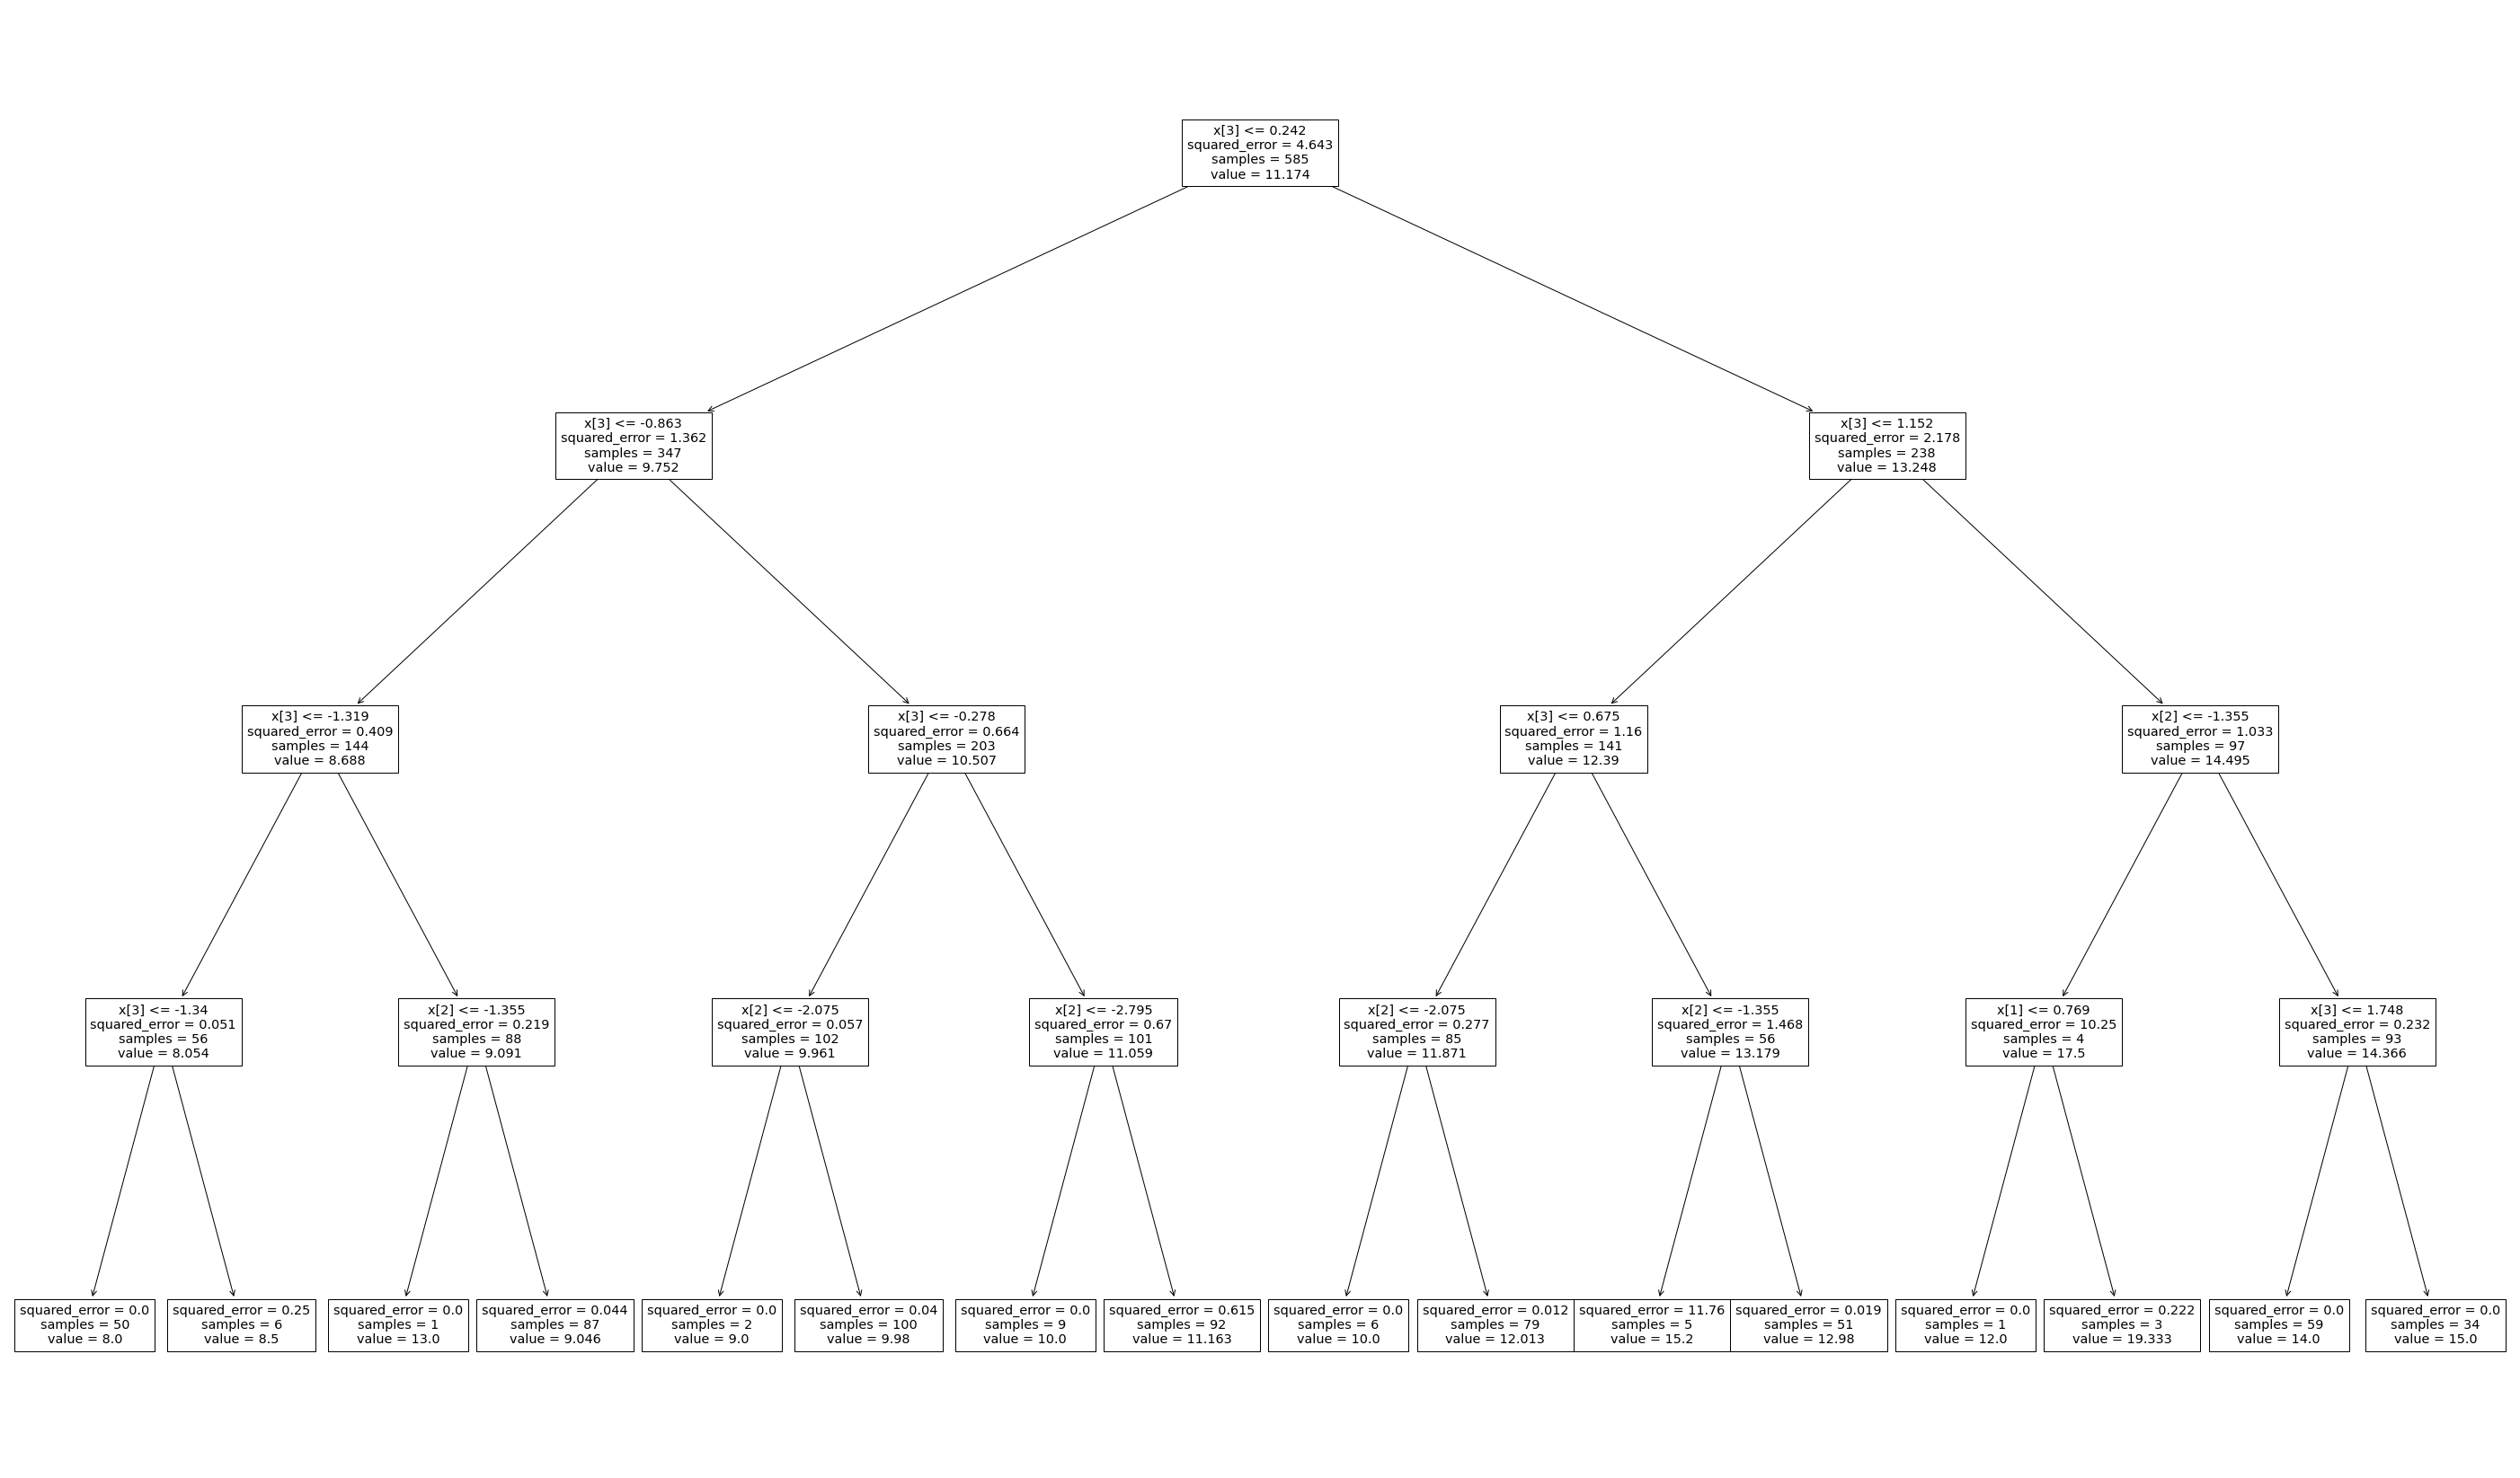

In [109]:
plt.figure(figsize=(50,30))
tree.plot_tree(dr)
plt.show()

## Random Forest Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [111]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [112]:
ypred = rf.predict(X_test)

In [113]:
print("training score = ",rf.score(X_train,y_train))
print("testing score = ",rf.score(X_test,y_test))

training score =  0.9955058764905732
testing score =  0.9367670696262624


In [114]:
r2_score(y_test,ypred)

0.9367670696262624

It is clearly overfitting, let's use GridSearch CV and try to improve it

In [115]:
no_of_decision_tree = [10,20,30,40,50,60,70,80,90,100]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]
criterion_of_decision_tree = ["squared_error", "poisson"]
min_sample_split=[2,3,4,5,6]

In [116]:
random_grid = {
    'n_estimators' : no_of_decision_tree,
    'max_features' : max_no_of_features,
    'max_depth' : max_depth,
    'criterion' : criterion_of_decision_tree,
    'min_samples_split' : min_sample_split
}

### Hyper Parameter Tuning

In [117]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = rf , param_distributions = random_grid , n_iter = 25 , cv = 5 ,n_jobs=-1)
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [118]:
rscv.best_params_

{'n_estimators': 60,
 'min_samples_split': 3,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'squared_error'}

In [119]:
rf = RandomForestRegressor(n_estimators = 50 , min_samples_split = 3, max_features =  'sqrt', max_depth = 11, criterion='squared_error')

In [120]:
rf.fit(X_train,y_train)
ypred = rf.predict(X_test)

Checking if model is overfitted or underfitted

In [121]:
print("training score = ",rf.score(X_train,y_train))
print("testing score = ",rf.score(X_test,y_test))

training score =  0.9930306392938272
testing score =  0.9390870471301823


In [122]:
r2_score(y_test,ypred)

0.9390870471301823

In [123]:
import pickle
# open file where you want to store the data
# file=open('decisiontree_regressor.pkl','wb')
# dump file information to that file
# pickle.dump(dr,file)

In [126]:
pickle.dump(dr,open('decisiontree_regressor.pkl','wb'))

In [128]:
# model=pickle.load(open('decisiontree_regressor.pkl', 'rb'))